<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST-104---ADVANCED-MACHINE-LEARNING/blob/main/3B_VICTORIA_EXER6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST 104 - ADVANCED MACHINE LEARNING**

**LESLY-ANN B. VICTORIA from BSCS-IS-3B - ASSESSMENT TASK 6**

**"Predicting Feedback on Online Food Orders Using Logistic Regression"**

In [ ]:
#Importing Libraries:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Part 1: Data Loading and Preprocessing**


In [ ]:
#Load the Dataset:
data = pd.read_csv("onlinefoods.csv")

#Handle Missiong Values:
data.isnull().sum()

#Encode Categorical Variables:
numeric_features = ['Age', 'Family size']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Feature Selection:
features = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Family size']
target = 'Feedback'
X = data[features]
y = data[target]

**Part 2: Exploratory Data Analysis (EDA)**

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000 

Positive     317
Negative      71
Name: Feedback, dtype: int64 



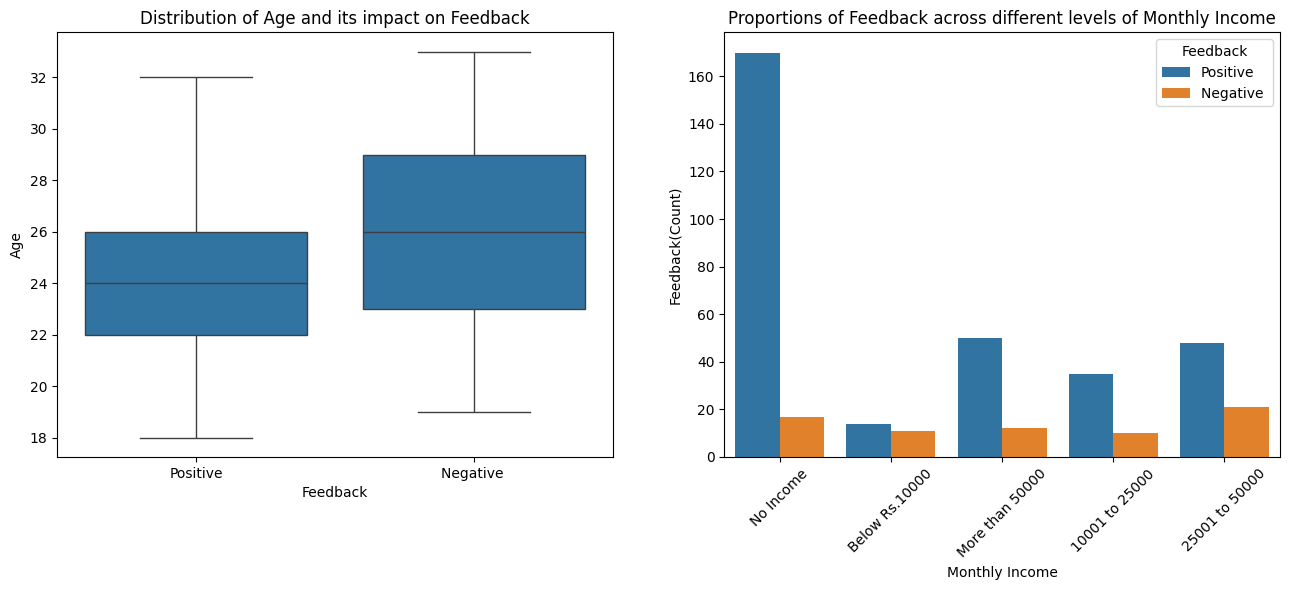

<ipython-input-4-6c86ba72524d>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


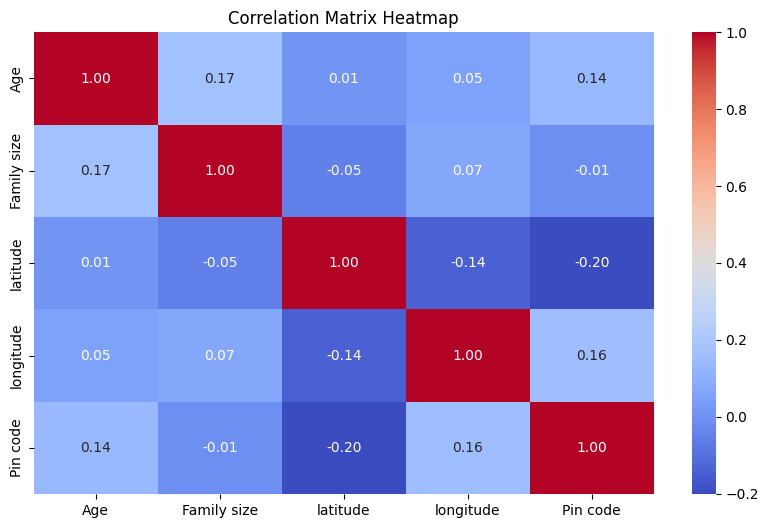

In [ ]:
#Describe Statistics:
statistics = data.describe()
print(statistics, '\n')
feedback = data['Feedback'].value_counts()
print(feedback, '\n')

#Visualizations:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Feedback', y='Age', data=data)
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.title('Distribution of Age and its impact on Feedback')

plt.subplot(1, 2, 2)
sns.countplot(x='Monthly Income', hue='Feedback', data=data)
plt.xlabel('Monthly Income')
plt.ylabel('Feedback(Count)')
plt.title('Proportions of Feedback across different levels of Monthly Income')
plt.xticks(rotation=45)
plt.legend(title='Feedback')
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

plt.figure(figsize=(10, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Part 3: Logistic Regression Model**

In [ ]:
#Build the Model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
clf.fit(X_train, y_train)

#Model Evaluation:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix: \n{conf_matrix}\n')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.8461538461538461

Confusion Matrix: 
[[ 0 11]
 [ 1 66]]

Classification Report: 
              precision    recall  f1-score   support

   Negative        0.00      0.00      0.00        11
    Positive       0.86      0.99      0.92        67

    accuracy                           0.85        78
   macro avg       0.43      0.49      0.46        78
weighted avg       0.74      0.85      0.79        78



**Part 4: Data Analysis and Visualization**

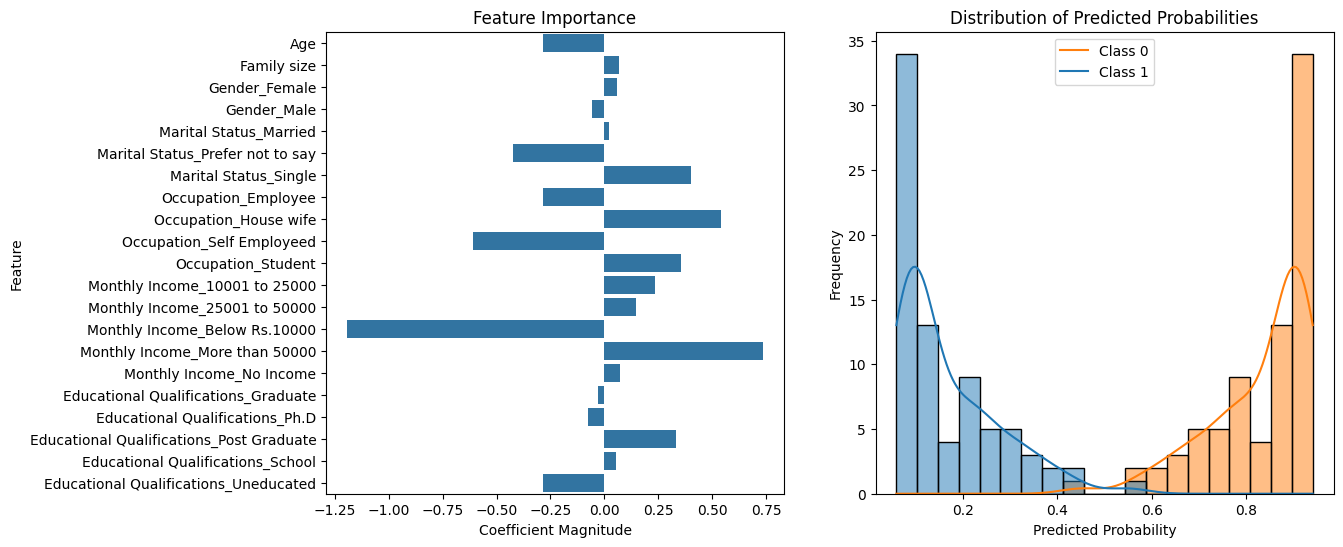

In [ ]:
#Feature Importance:
categorical_encoder = (clf.named_steps['preprocessor']
                       .named_transformers_['cat']
                       .named_steps['onehot'])
feature_names = numeric_features + list(categorical_encoder.get_feature_names_out(categorical_features))
feature_importance = clf.named_steps['classifier'].coef_[0]
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')

#Prediction Insights:
y_pred_proba = clf.predict_proba(X_test)
plt.subplot(1, 2, 2)
sns.histplot(y_pred_proba, bins=20, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend(['Class 0', 'Class 1'])
plt.subplots_adjust(wspace=0.2)
plt.show()